1. About data
For this analysis, I have used 2 years of historical data from around mid-Feb 2018 to Feb 2020 of the below stocks listed on National Stock Exchange(NSE)—

HDFC Ltd.
Sun Pharmaceutical Industries Ltd.
Tata Consultancy Services Ltd.
Jindal Steel & Power Ltd.
Jubilant FoodWorks Ltd.

2. Understanding data & general statistics
Import necessary libraries —

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import package
import pandas_datareader.data as web
# set start and end dates 
start = datetime.datetime(2018, 2, 15)
end = datetime.datetime(2020, 2, 14) 
# extract the closing price data
combined_df = web.DataReader(['HDFC.NS', 'JINDALSTEL.NS','JUBLFOOD.NS','SUNPHARMA.NS', 'TCS.NS', '^NSEI'],
                             'yahoo', start = start, end = end)['Adj Close']

In [5]:
# drop null values
combined_df.dropna(inplace = True, axis = 0)
# display first few rows
combined_df.head()

Symbols,HDFC.NS,JINDALSTEL.NS,JUBLFOOD.NS,SUNPHARMA.NS,TCS.NS,^NSEI
Date,,,,,,
2018-02-15,1704.119507,264.763580,198.565872,552.590515,1342.856079,10545.500000
2018-02-16,1691.078735,250.944199,192.619461,552.110474,1346.160522,10452.299805
2018-02-19,1689.728271,249.447510,196.784424,538.817749,1341.823242,10378.400391
2018-02-20,1687.585938,251.443085,197.115036,536.994263,1351.530273,10360.400391
2018-02-21,1699.741577,246.753479,196.434021,504.601715,1396.302246,10397.450195


### Correlation Analysis Of Stocks with Pair plot and Joint plots

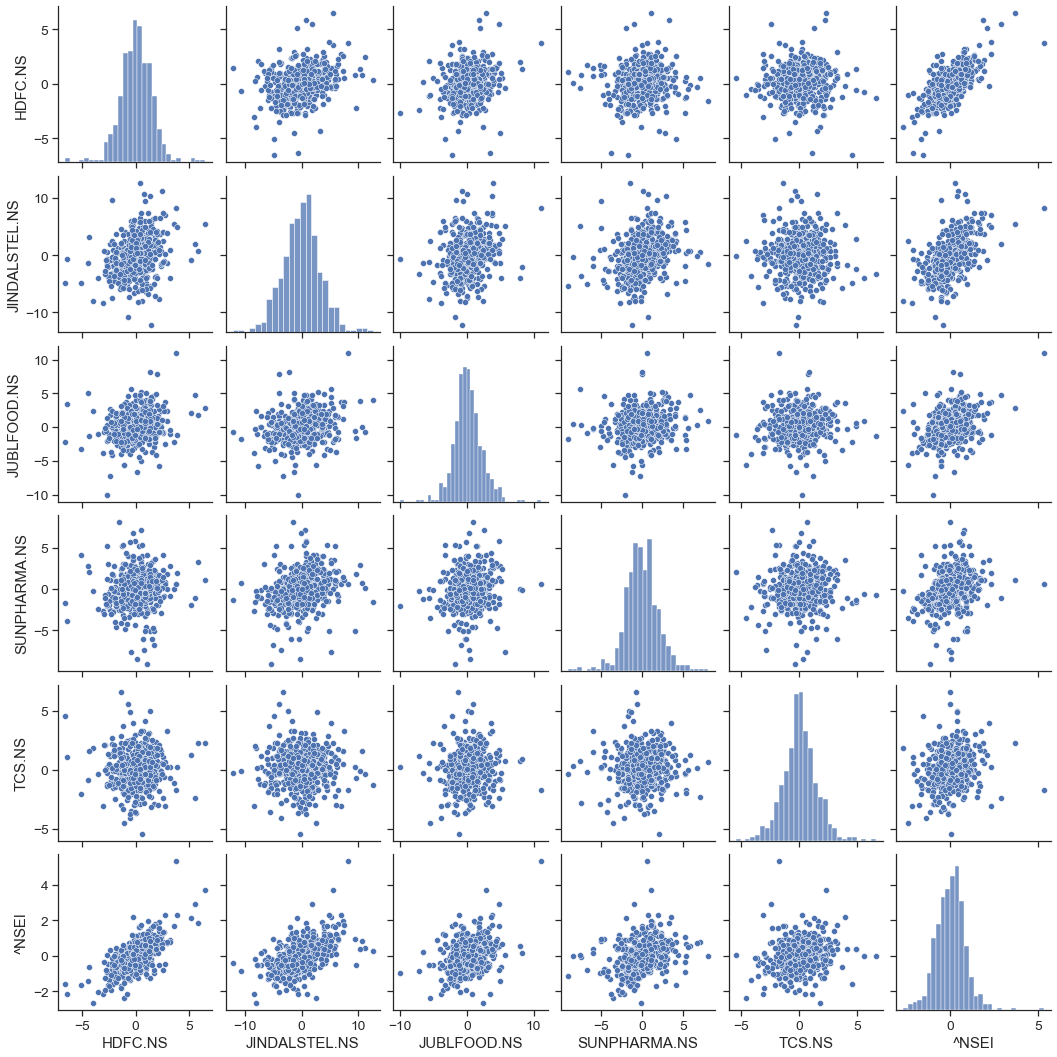

In [7]:
# store daily returns of all above stocks in a new dataframe 
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)
# plotting pairplot  
import seaborn as sns
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

Volatility analysis:
    
Volatility is one of the most important pillars in financial markets. A stock is said to have high volatility if its value can change dramatically within a short span of time. On other hand, lower volatility means that value of stock tends to be relatively steady over a period of time. These movements are due to several factors including demand and supply, sentiment, corporate actions, greed, and fear, etc. Mathematically, volatility is measured using a statistical measure called ‘standard deviation’, which measures an asset’s departure from its average value.

We have already calculated the intraday returns (daily returns) of the HDFC stock and several other stocks. Next, we will calculate the 7-day rolling mean(also called moving average) of the daily returns, then compute the standard deviation (which is square root of the variance) and plot the values. Relax, we don’t have to calculate all this manually; Pandas ‘rolling()’ function and ‘std()’ function does the job for us in just one line

<AxesSubplot:xlabel='Date'>

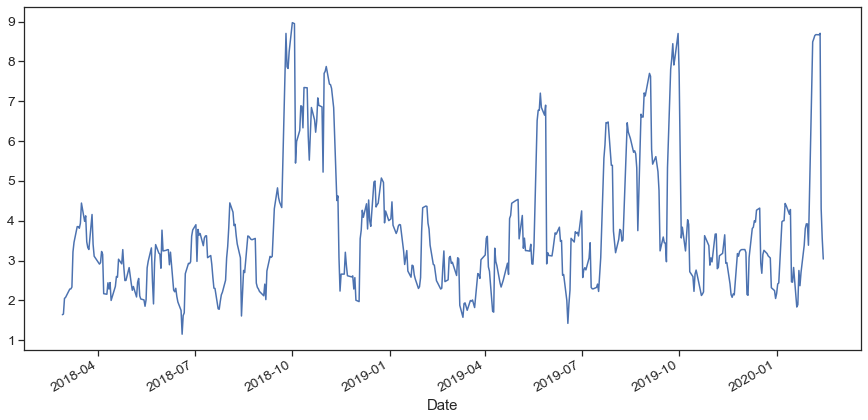

In [10]:
HDFC_vol = pct_chg_df['HDFC.NS'].rolling(7).std()*np.sqrt(7)
HDFC_vol.plot(figsize = (15, 7))

Next we’ll see the comparative volatility analysis of HDFC stock with SunPharma stock and NIFTY50 index. Just like above, we compute 7-day rolling mean, and standard deviation, all in a single line of code.

<AxesSubplot:xlabel='Date'>

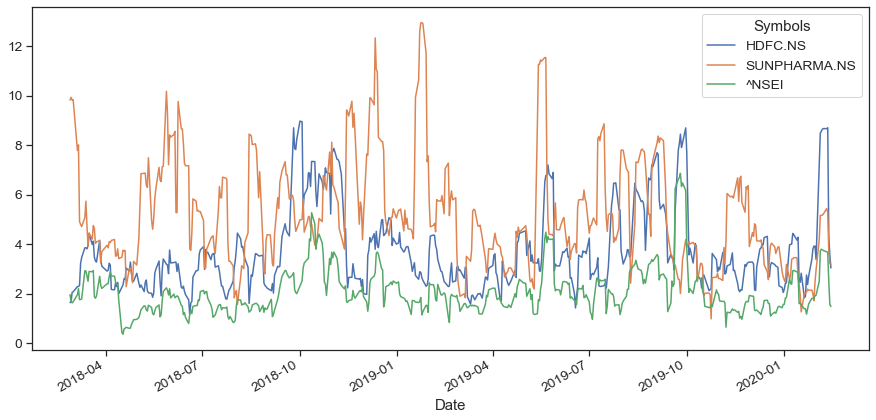

In [11]:
volatility = pct_chg_df[['HDFC.NS', 'SUNPHARMA.NS', '^NSEI']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (15, 7))

In [18]:
HDFC_df = web.DataReader(['HDFC.NS'],
                             'yahoo', start = start, end = end)['Adj Close']
HDFC_df
HDFC_df.dropna(axis = 0, inplace = True)

In [19]:
HDFC_df['Day_Perc_Change'] = HDFC_df.pct_change()*100
HDFC_df.head()

Symbols,HDFC.NS,Day_Perc_Change
Date,,
2018-02-15,1704.119507,NaN
2018-02-16,1691.078857,-0.765243
2018-02-19,1689.728394,-0.079858
2018-02-20,1687.585693,-0.126807
2018-02-21,1699.741699,0.720319


<AxesSubplot:xlabel='Date'>

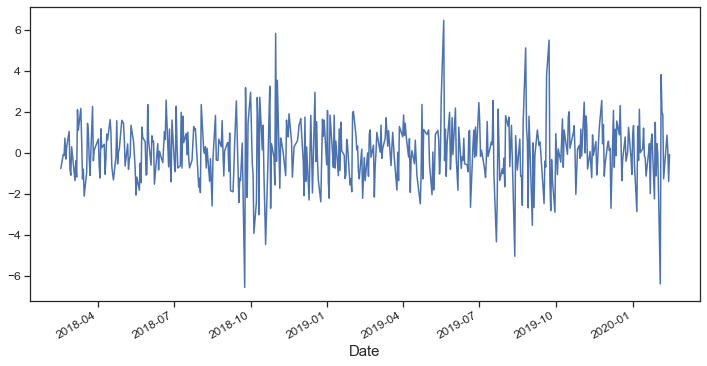

In [20]:
HDFC_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

Plotting daily returns distribution histogram:

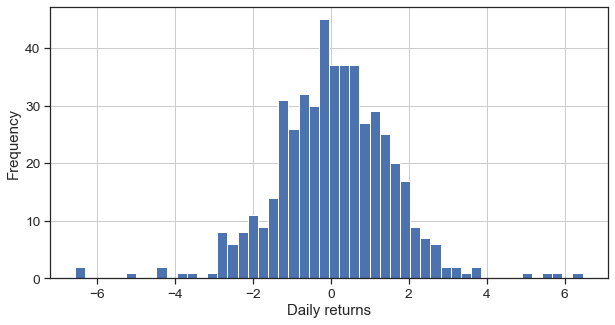

count    490.000000
mean       0.072189
std        1.491031
min       -6.561932
25%       -0.804406
50%        0.058352
75%        1.009955
max        6.463018
Name: Day_Perc_Change, dtype: float64

In [21]:
HDFC_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
HDFC_df.Day_Perc_Change.describe()

In [24]:
import pandas as pd
import yfinance as yf
#from yahoofinancials import YahooFinancials

In [33]:
HDFC_df = yf.download('HDFC.NS', 
                      start=start, 
                      end=end, 
                      progress=False)
HDFC_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-15,1828.900024,1851.000000,1819.150024,1829.500000,1704.119507,3382968
2018-02-16,1835.500000,1836.949951,1804.199951,1815.500000,1691.078857,2368880
2018-02-19,1827.750000,1830.199951,1801.000000,1814.050049,1689.728271,1603737
2018-02-20,1832.900024,1840.000000,1802.500000,1811.750000,1687.586182,2523482
2018-02-21,1825.000000,1832.699951,1816.000000,1824.800049,1699.741577,3795216


In [29]:
HDFC_df = HDFC_df.dropna(axis = 0, inplace = True)

In [35]:
HDFC_df['Day_Perc_Change'] = HDFC_df['Adj Close'].pct_change()*100
HDFC_df.head()

,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,
2018-02-15,1828.900024,1851.000000,1819.150024,1829.500000,1704.119507,3382968,NaN
2018-02-16,1835.500000,1836.949951,1804.199951,1815.500000,1691.078857,2368880,-0.765243
2018-02-19,1827.750000,1830.199951,1801.000000,1814.050049,1689.728271,1603737,-0.079865
2018-02-20,1832.900024,1840.000000,1802.500000,1811.750000,1687.586182,2523482,-0.126771
2018-02-21,1825.000000,1832.699951,1816.000000,1824.800049,1699.741577,3795216,0.720283


In [36]:
HDFC_df.dropna(axis = 0, inplace = True)

<AxesSubplot:xlabel='Date'>

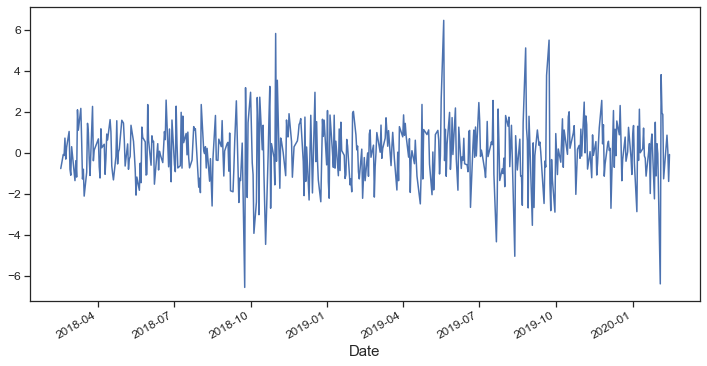

In [37]:
HDFC_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

It can be observed that for most of the days, the returns are between -2% to 2% with few spikes in between crossing 6% mark on both the sides.

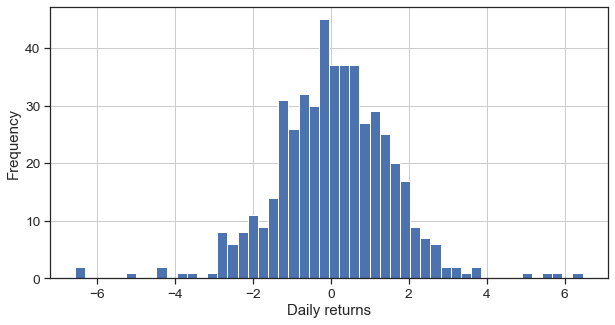

count    490.000000
mean       0.072189
std        1.491031
min       -6.561912
25%       -0.804423
50%        0.058361
75%        1.009956
max        6.463017
Name: Day_Perc_Change, dtype: float64

In [38]:
HDFC_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
HDFC_df.Day_Perc_Change.describe()

Trend Analysis

Next we add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above. Trend is determined from below relationship —

In [40]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
HDFC_df['Trend']= np.zeros(HDFC_df['Day_Perc_Change'].count())
HDFC_df['Trend']= HDFC_df['Day_Perc_Change'].apply(lambda x:trend(x))
HDFC_df.head()

,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,
2018-02-16,1835.500000,1836.949951,1804.199951,1815.500000,1691.078857,2368880,-0.765243,Slight Negative
2018-02-19,1827.750000,1830.199951,1801.000000,1814.050049,1689.728271,1603737,-0.079865,Slight or No change
2018-02-20,1832.900024,1840.000000,1802.500000,1811.750000,1687.586182,2523482,-0.126771,Slight or No change
2018-02-21,1825.000000,1832.699951,1816.000000,1824.800049,1699.741577,3795216,0.720283,Slight Positive
2018-02-22,1819.699951,1825.000000,1807.699951,1819.250000,1694.572021,6229874,-0.304138,Slight or No change


### Visualizing Trend Frequency with Pie-Chart:

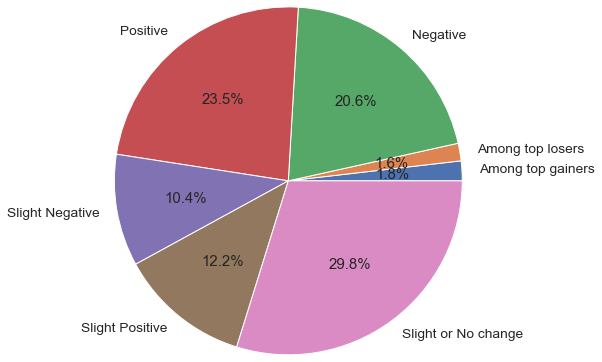

In [43]:
HDFC_pie_data = HDFC_df.groupby('Trend')
pie_label = sorted([i for i in HDFC_df.loc[:, 'Trend'].unique()])
plt.pie(HDFC_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

For the period under consideration from mid-Feb 2018 to Feb 2020, the HDFC stock was among the top gainers for about 1.8% of the time, and among the top losers for 1.6 %. For about 12.4% of the time period, the stock has performed positively on a given day. Likewise, for most period of time (about 29.6%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.